In [ ]:
pip install pandas scikit-learn imbalanced-learn


   ---------------------------------------- 0.0/238.4 kB ? eta -:--:--
   ---------------------------- ---------- 174.1/238.4 kB 10.2 MB/s eta 0:00:01
   ---------------------------------------- 238.4/238.4 kB 7.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\Egoista\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd
import joblib

In [ ]:
import pandas as pd

corpus = []
target = []
edad = []
sexo = []

archivo = open("dataset_elpino.csv", encoding="utf-8")
header = archivo.readline().strip().split(";")

features = []
for col in header:
    col = col.split("-")[0].strip()
    if col.startswith("Diag") or col.startswith("Proc"):
        col = col.split()
        col = col[0] + col[1]
    features.append(col)

for linea in archivo:
    row = []
    linea = linea.strip().split(";")
    for i in range(len(linea)):
        col = linea[i].split("-")[0].strip()
        if i == 67:
            grd = col
            target.append(grd)
        elif i == 66:
            sexo.append(1 if col == "Mujer" else 0)
        elif i == 65:
            edad.append(int(col))
        else:
            row.append(col)
    corpus.append(row)

# Crear DataFrame e incluir Edad, Sexo y GRD como columnas
df = pd.DataFrame(corpus, columns=features[:65])  # columnas originales hasta la 65
df["Edad"] = edad
df["Sexo"] = sexo
df["GRD"] = target

# Guardar a CSV
df.to_csv("dataset.csv", index=False, encoding="utf-8", sep=";")


In [ ]:
data=df

In [ ]:
filtro=(df["GRD"]=='146101') | (df["GRD"]=='146102') | (df["GRD"]=='146103')

In [ ]:
features_procedimientos=[]
features_diagnosticos=[]
for j in range(1,36):
    field="Diag"+str(j).zfill(2)
    features_diagnosticos.append(field)
for j in range(1,31):
    field="Proced"+str(j).zfill(2)
    features_procedimientos.append(field)

In [ ]:
procedimientos={}
diagnosticos={}
for i, row in data.iterrows():
    for j in range(1,36):
        field="Diag"+str(j).zfill(2)
        if row[field] not in diagnosticos:
            diagnosticos[row[field]]=1
        else:
            diagnosticos[row[field]]+=1
    for j in range(1,31):
        field="Proced"+str(j).zfill(2)
        if row[field] not in procedimientos:
            procedimientos[row[field]]=1
        else:
            procedimientos[row[field]]+=1
token_diagnosticos=list(diagnosticos.keys())
token_procedimientos=list(procedimientos.keys())
vocabulario=len(token_diagnosticos)+len(token_procedimientos)+1
print("Diagnósticos: ",len(token_diagnosticos))
print("Procedimientos: ",len(token_procedimientos))
print("Vocabulario: ",vocabulario)

Diagnósticos:  3649
Procedimientos:  904
Vocabulario:  4554


In [ ]:
df["GRD"].value_counts()[:60]

,count
GRD,
146101,813
146121,639
146131,538
158171,389
134161,325
071141,317
044153,287
061131,252
041023,248


In [ ]:
grd_counts = df["GRD"].value_counts()
grd_counts


,count
GRD,
146101,813
146121,639
146131,538
158171,389
134161,325
...,...
214103,1
054223,1
114142,1


In [ ]:
# Cargar el dataset
df = pd.read_csv("dataset.csv", encoding="utf-8", sep=";")

# Calcular las frecuencias de cada categoría de GRD
grd_counts = df["GRD"].value_counts()

# Identificar las categorías de GRD con menos de 5 ocurrencias
grd_to_replicate = grd_counts[grd_counts < 5].index

# Lista para acumular filas duplicadas
replicated_rows = []

# Duplicar las filas minoritarias 5 veces
for grd_category in grd_to_replicate:
    rows_to_replicate = df[df["GRD"] == grd_category]

    # Agregar 5 copias de cada fila minoritaria
    for _ in range(5):
        replicated_rows.append(rows_to_replicate.copy())

# Concatenar el dataset original con las filas replicadas
if replicated_rows:
    df = pd.concat([df] + replicated_rows, ignore_index=True)

# Mostrar el conteo actualizado de GRD
print(df["GRD"].value_counts())

# Guardar el nuevo archivo CSV
df.to_csv("replicated_dataset.csv", index=False, encoding="utf-8", sep=";")


<ipython-input-4-2009ff1158b4>:2: DtypeWarning: Columns (25,26,27,28,29,30,31,32,33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("dataset_Bueno.csv", encoding="utf-8", sep=";")


GRD
146101    813
146121    639
146131    538
158171    389
134161    325
         ... 
214111      5
158083      5
34133       5
184113      5
134142      5
Name: count, Length: 526, dtype: int64


In [ ]:
# Calculate the frequencies of each GRD category
grd_counts = df["GRD"].value_counts()

# Identify GRD categories with only one occurrence
grd_to_replicate = grd_counts[grd_counts == 1].index

# List to accumulate replicated rows
replicated_rows = []

# Replicate rows with GRD count equal to 1, five times each
for grd_category in grd_to_replicate:
    rows_to_replicate = df[df["GRD"] == grd_category]
    for _ in range(5):
        replicated_rows.append(rows_to_replicate.copy())

# Concatenate the original dataset with the replicated rows
if replicated_rows:
    df = pd.concat([df] + replicated_rows, ignore_index=True)

# Display the updated GRD count
print(df["GRD"].value_counts())

# Save the new CSV file
df.to_csv("replicated_dataset.csv", index=False, encoding="utf-8", sep=";")


GRD
146101    813
146121    639
146131    538
158171    389
134161    325
         ... 
214111      5
158083      5
034133      5
184113      5
134142      5
Name: count, Length: 526, dtype: int64


In [ ]:
pub = grd_counts[(grd_counts < 5)]
pub

,count
GRD,


In [ ]:
import pandas as pd

# Cargar el dataset
df = pd.read_csv("replicated_dataset.csv", encoding="utf-8", sep=";")

# Rellenar las casillas vacías con "Desconocido"
df.fillna("Desconocido", inplace=True)

# Guardar el nuevo archivo CSV con las casillas vacías normalizadas
df.to_csv("normalized_dataset.csv", index=False, encoding="utf-8", sep=";")


<ipython-input-8-d6c0860083cf>:6: DtypeWarning: Columns (25,26,27,28,29,30,31,32,33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("replicated_dataset.csv", encoding="utf-8", sep=";")
<ipython-input-8-d6c0860083cf>:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Desconocido' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna("Desconocido", inplace=True)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib

# Parámetro: límite de datos a procesar (None para todo el dataset)
limite_datos = 10000 # Cambia este valor según lo que necesites, o pon None para todo

# Cargar datos (con límite si se especifica)
df = pd.read_csv("normalized_dataset.csv", sep=";", encoding="utf-8", nrows=limite_datos)

# Extraer severidad del último dígito de la columna GRD
df["Severidad"] = df["GRD"].astype(str).str[-1].astype(int)

# Features: eliminamos 'GRD' y 'Severidad' del entrenamiento
X = df.drop(columns=["GRD", "Severidad"])
y = df["Severidad"]

# Codificación de variables categóricas si existen
X = pd.get_dummies(X)

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4, random_state=42)

# Definir y entrenar el perceptrón multicapa
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), alpha=0.001, max_iter=200, random_state=1)
mlp.fit(X_train, y_train)

# Evaluación
y_pred = mlp.predict(X_test)

# Guardar el modelo
joblib.dump(mlp, "mlp_model.pkl")

# Resultados
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))


Matriz de confusión:
[[1652  132   53]
 [ 150  542  151]
 [  54  114  752]]

Reporte de clasificación:
              precision    recall  f1-score   support

           1       0.89      0.90      0.89      1837
           2       0.69      0.64      0.66       843
           3       0.79      0.82      0.80       920

    accuracy                           0.82      3600
   macro avg       0.79      0.79      0.79      3600
weighted avg       0.82      0.82      0.82      3600



In [ ]:
df = pd.read_csv("normalized_dataset.csv", sep=";", encoding="utf-8")


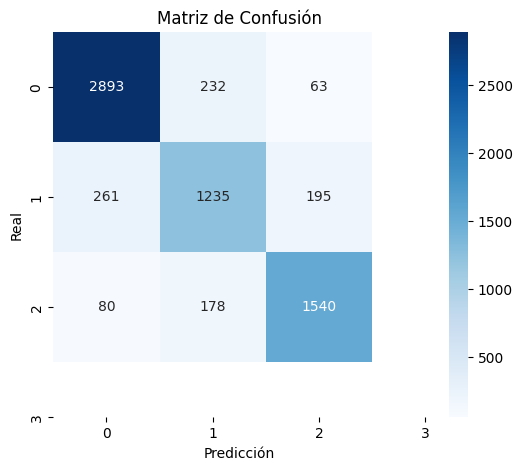

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1,2,3], yticklabels=[0,1,2,3])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()


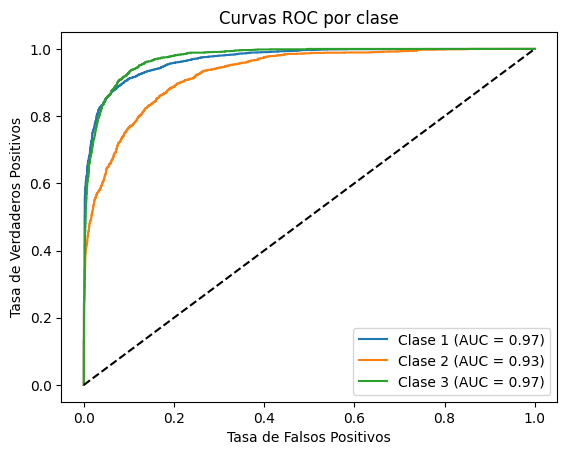

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt # Import the matplotlib.pyplot module

# Binarizar clases para ROC multiclase
y_test_bin = label_binarize(y_test, classes=[1, 2, 3])
y_prob = mlp.predict_proba(X_test)

# AUC por clase
for i in range(3):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    auc = roc_auc_score(y_test_bin[:, i], y_prob[:, i])
    plt.plot(fpr, tpr, label=f'Clase {i+1} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curvas ROC por clase")
plt.legend()
plt.show()

Iteration 1, loss = 0.94573160
Validation score: 0.663333
Iteration 2, loss = 0.34694730
Validation score: 0.751667
Iteration 3, loss = 0.08057716
Validation score: 0.771667
Iteration 4, loss = 0.02363153
Validation score: 0.781667
Iteration 5, loss = 0.00891468
Validation score: 0.778333
Iteration 6, loss = 0.00503470
Validation score: 0.786667
Iteration 7, loss = 0.00378763
Validation score: 0.786667
Iteration 8, loss = 0.00310822
Validation score: 0.788333
Iteration 9, loss = 0.00268605
Validation score: 0.793333
Iteration 10, loss = 0.00240883
Validation score: 0.795000
Iteration 11, loss = 0.00220109
Validation score: 0.796667
Iteration 12, loss = 0.00204373
Validation score: 0.796667
Iteration 13, loss = 0.00191959
Validation score: 0.796667
Iteration 14, loss = 0.00181985
Validation score: 0.796667
Iteration 15, loss = 0.00173770
Validation score: 0.796667
Iteration 16, loss = 0.00166782
Validation score: 0.801667
Iteration 17, loss = 0.00161116
Validation score: 0.801667
Iterat

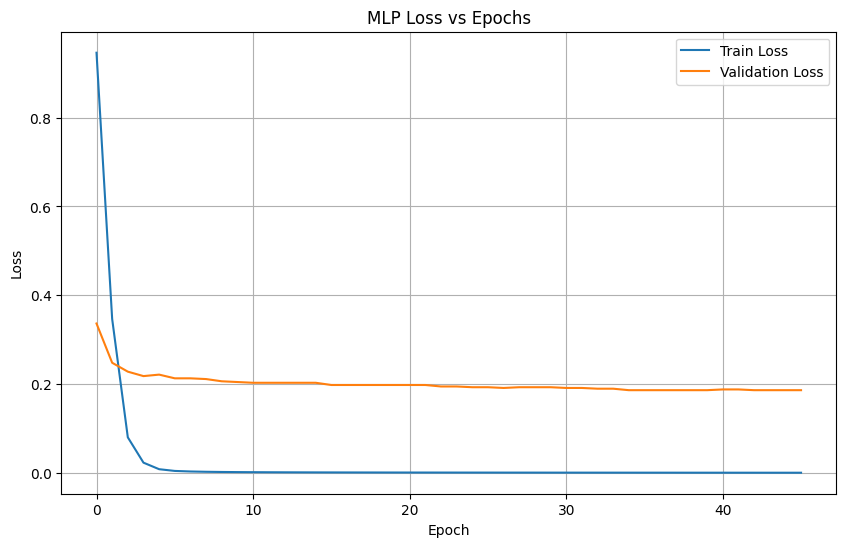

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib

# Parámetro: límite de datos a procesar (None para todo el dataset)
limite_datos = 10000  # Cambia este valor si quieres

# Cargar datos
df = pd.read_csv("normalized_dataset.csv", sep=";", encoding="utf-8", nrows=limite_datos)

# Extraer severidad del último dígito de la columna GRD
df["Severidad"] = df["GRD"].astype(str).str[-1].astype(int)

# Features: eliminamos 'GRD' y 'Severidad'
X = df.drop(columns=["GRD", "Severidad"])
y = df["Severidad"]

# Codificación de variables categóricas si existen
X = pd.get_dummies(X)

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4, random_state=42)

# Definir y entrenar el perceptrón multicapa
mlp = MLPClassifier(
    hidden_layer_sizes=(100, 50),
    alpha=0.001,
    max_iter=500,
    random_state=1,
    early_stopping=True,         # <<--- Activamos validación automática
    validation_fraction=0.1,     # <<--- Usa 10% de X_train como validación interna
    n_iter_no_change=10,          # <<--- Si no mejora en 10 epochs, se detiene
    verbose=True
)
mlp.fit(X_train, y_train)

# Evaluación
y_pred = mlp.predict(X_test)

# Guardar el modelo y scaler
joblib.dump(mlp, "mlp_model.pkl")
joblib.dump(scaler, "scaler.pkl")

# Resultados
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Graficar la curva de pérdida
plt.figure(figsize=(10, 6))
plt.plot(mlp.loss_curve_, label="Train Loss")
if hasattr(mlp, "validation_scores_"):
    val_loss = [1 - score for score in mlp.validation_scores_]
    plt.plot(val_loss, label="Validation Loss")
plt.title('MLP Loss vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
import numpy as np
import pandas as pd
import joblib
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


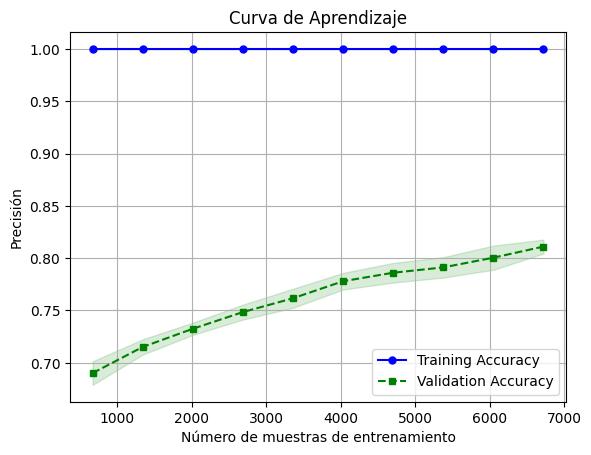

In [ ]:
# Cargar el modelo
mlp = joblib.load("mlp_model.pkl")

# Extraer severidad y preparar datos (igual que antes)
df["Severidad"] = df["GRD"].astype(str).str[-1].astype(int)
X = df.drop(columns=["GRD", "Severidad"])
y = df["Severidad"]
X = pd.get_dummies(X)

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4, random_state=42)

# Generar la curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(estimator=mlp, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='accuracy', n_jobs=-1) # Usar n_jobs=-1 para usar todos los núcleos disponibles

# Calcular la media y la desviación estándar de las puntuaciones
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Dibujar la curva de aprendizaje
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.grid()
plt.xlabel('Número de muestras de entrenamiento')
plt.ylabel('Precisión')
plt.title('Curva de Aprendizaje')
plt.legend(loc='lower right')
plt.show()


In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    mlp, X_scaled, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', label="Entrenamiento")
plt.plot(train_sizes, test_scores_mean, 'o-', label="Validación")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Precisión")
plt.title("Curva de Aprendizaje")
plt.legend()
plt.grid()
plt.show()


In [ ]:
import shap
import numpy as np

# Seleccionar un subconjunto pequeño por velocidad
X_sample = X_test[:100]

# Crear el explainer para modelos tipo MLPClassifier (kernel explainer para modelos no tree-based)
# Increase max_evals to at least 2 * num_features + 1
explainer = shap.Explainer(mlp.predict, X_sample, max_evals=X_sample.shape[1] * 2 + 1)
shap_values = explainer(X_sample)

# Visualizar los valores SHAP para algunas predicciones
shap.summary_plot(shap_values, X_sample, plot_type="bar")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MLPClass

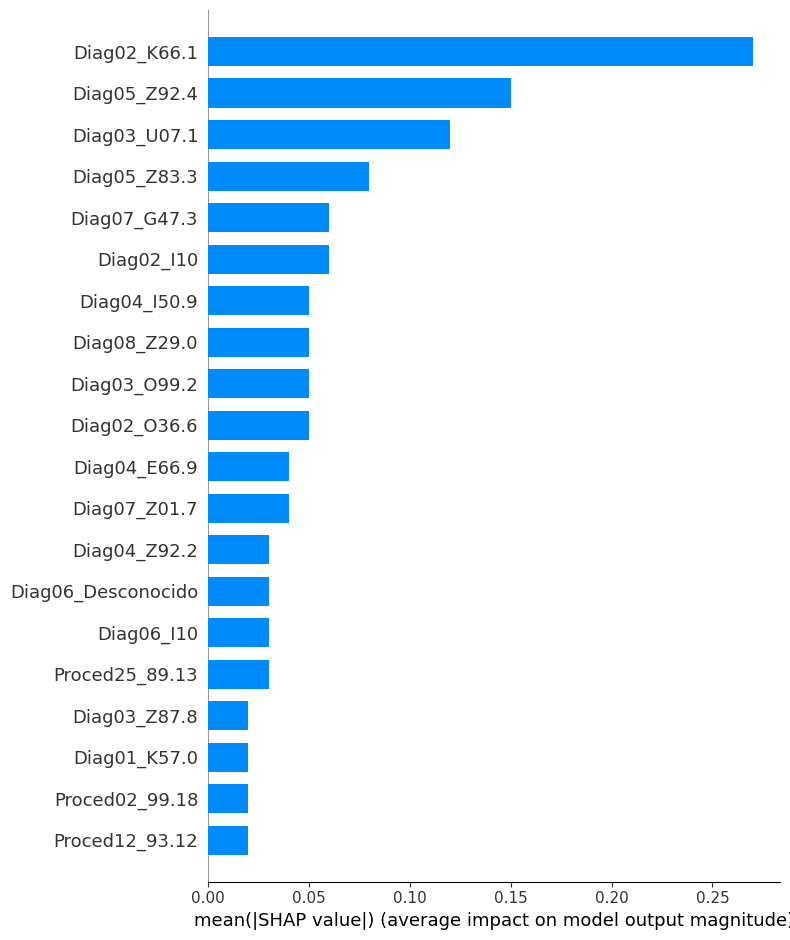

In [ ]:
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

# 1. Cargar datos
df = pd.read_csv("normalized_dataset.csv", sep=";", encoding="utf-8")
df["Severidad"] = df["GRD"].astype(str).str[-1].astype(int)

# 2. Preparar features y target
X = df.drop(columns=["GRD", "Severidad"])
X = pd.get_dummies(X)
y = df["Severidad"]

# 3. Escalar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Entrenar el modelo (si aún no lo has entrenado)
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, random_state=42)
mlp.fit(X_scaled, y)

# 5. Seleccionar un subconjunto para SHAP
X_sample = pd.DataFrame(X_scaled, columns=X.columns).sample(n=5, random_state=42)

# 6. Crear el explainer
explainer = shap.Explainer(mlp.predict, X_sample)
shap_values = explainer(X_sample)

# 7. Visualización general
shap.summary_plot(shap_values, X_sample, plot_type="bar")

# (Opcional) Visualizar una predicción individual
# shap.plots.waterfall(shap_values[0])


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MLPClass

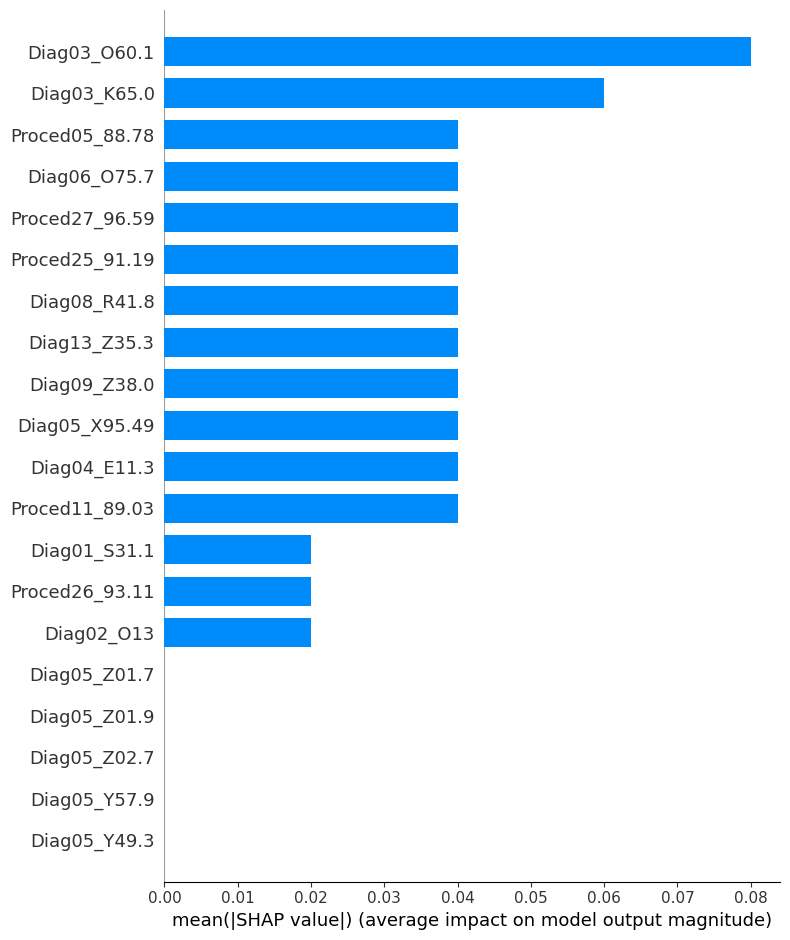

In [ ]:
import shap
import pandas as pd
import numpy as np

# Ejemplo de filtro: pacientes con GRD que terminan en 3 (severos)
filtro = df["GRD"].astype(str).str.endswith("3")

# Aplicar filtro al DataFrame original
df_filtrado = df[filtro]

# Preparar X (datos de entrada) y asegurarse de hacer el mismo one-hot encoding
X_filtrado = pd.get_dummies(df_filtrado.drop(columns=["GRD", "Severidad"]))

# Alinear columnas con X original (por si hay columnas ausentes o extra)
X_filtrado = X_filtrado.reindex(columns=X.columns, fill_value=0)

# Escalar el subconjunto
X_filtrado_scaled = scaler.transform(X_filtrado)

# Seleccionar solo unas pocas filas para SHAP por claridad
X_sample = pd.DataFrame(X_filtrado_scaled, columns=X.columns).sample(n=5, random_state=42)

# Aplicar SHAP
explainer = shap.Explainer(mlp.predict, X_sample)
shap_values = explainer(X_sample)

# Visualizar SHAP (global)
shap.summary_plot(shap_values, X_sample, plot_type="bar")

# (Opcional) Explicar un individuo
# shap.plots.waterfall(shap_values[0])


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MLPClass

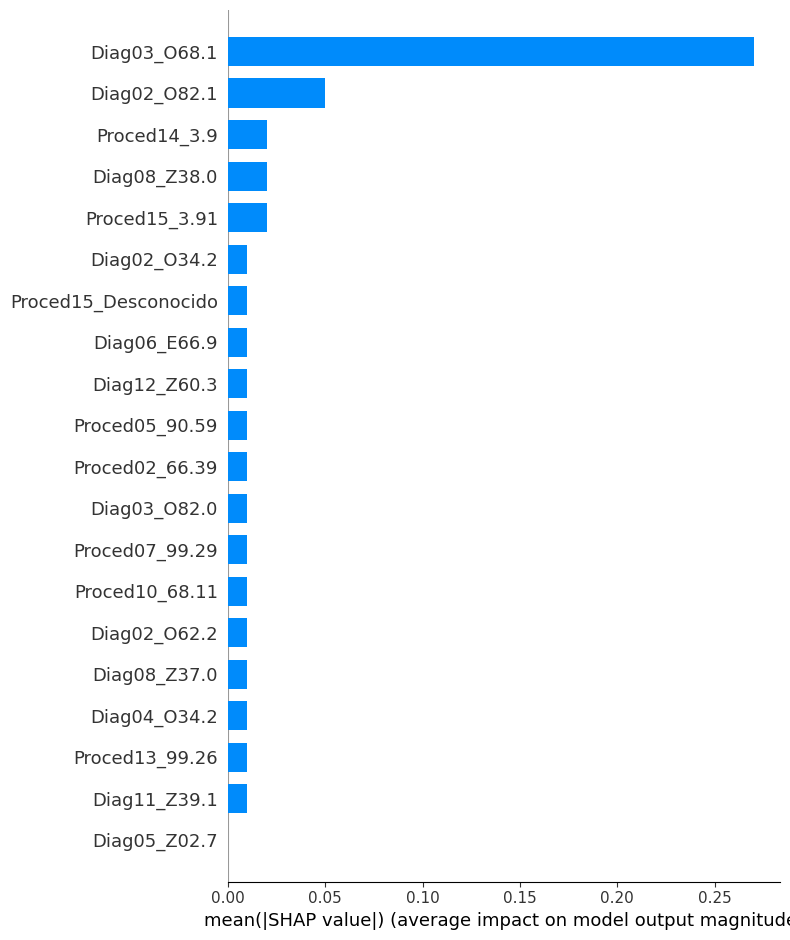

In [ ]:
import shap
import pandas as pd
import numpy as np

# Ensure your filter selects the intended data
# Convert the 'GRD' column to string type before applying the filter
filtro = df["GRD"].astype(str).isin(['146101', '146102', '146103'])
df_filtrado = df[filtro]

# Proceed with pre-processing if the filtered DataFrame is not empty
if not df_filtrado.empty:
    X_filtrado = pd.get_dummies(df_filtrado.drop(columns=["GRD", "Severidad"]))
    X_filtrado = X_filtrado.reindex(columns=X.columns, fill_value=0)
    X_filtrado_scaled = scaler.transform(X_filtrado)
    X_sample = pd.DataFrame(X_filtrado_scaled, columns=X.columns).sample(n=5, random_state=42)
    explainer = shap.Explainer(mlp.predict, X_sample)
    shap_values = explainer(X_sample)
    shap.summary_plot(shap_values, X_sample, plot_type="bar")
else:
    print("The filter resulted in an empty DataFrame. Please adjust the filter.")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MLPClass

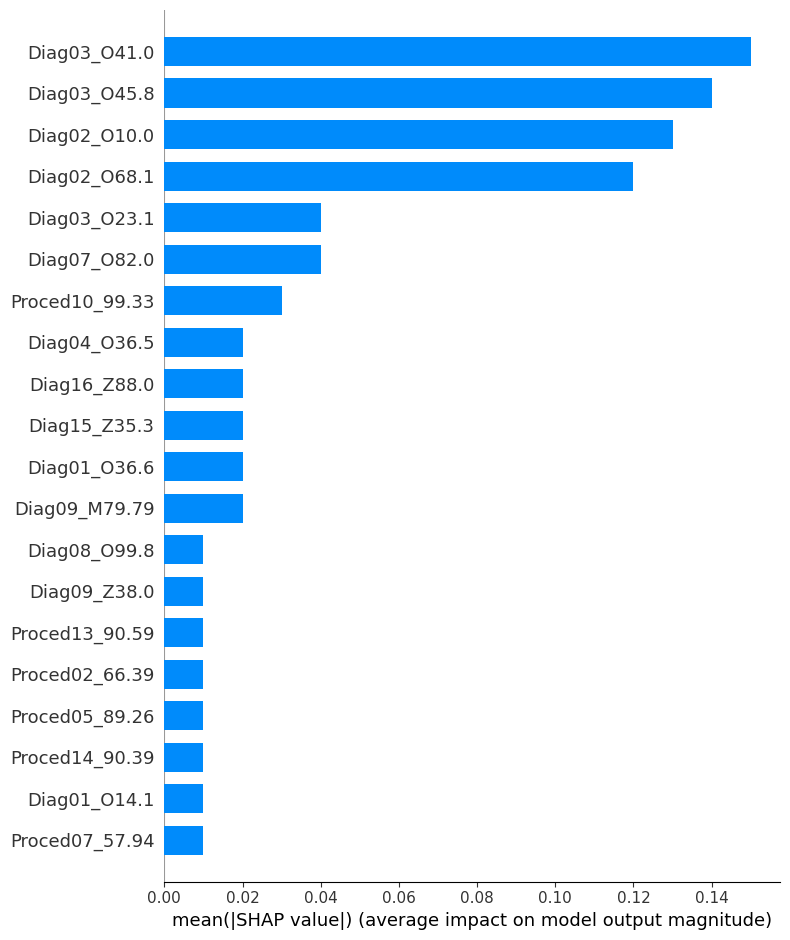

In [ ]:
import shap
import pandas as pd
import numpy as np

filtro = df["GRD"].astype(str).isin(['146102'])
df_filtrado = df[filtro]

if not df_filtrado.empty:
    X_filtrado = pd.get_dummies(df_filtrado.drop(columns=["GRD", "Severidad"]))
    X_filtrado = X_filtrado.reindex(columns=X.columns, fill_value=0)
    X_filtrado_scaled = scaler.transform(X_filtrado)
    X_sample = pd.DataFrame(X_filtrado_scaled, columns=X.columns).sample(n=5, random_state=42)
    explainer = shap.Explainer(mlp.predict, X_sample)
    shap_values = explainer(X_sample)
    shap.summary_plot(shap_values, X_sample, plot_type="bar")
else:
    print("The filter resulted in an empty DataFrame. Please adjust the filter.")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MLPClass

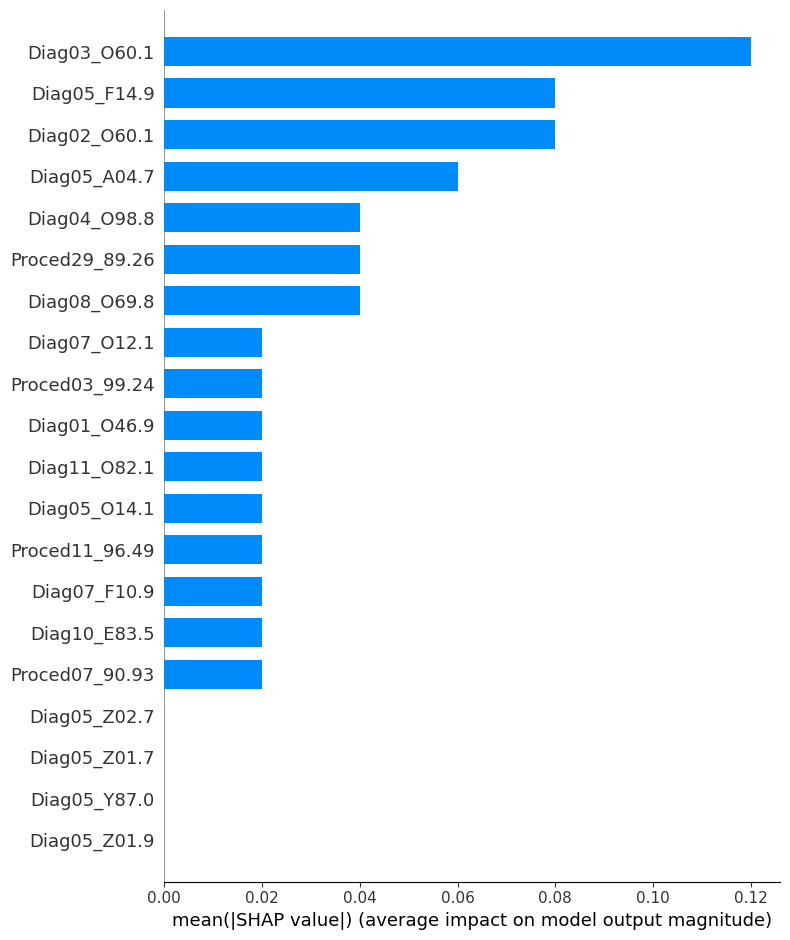

In [ ]:
import shap
import pandas as pd
import numpy as np

filtro = df["GRD"].astype(str).isin(['146103'])
df_filtrado = df[filtro]

if not df_filtrado.empty:
    X_filtrado = pd.get_dummies(df_filtrado.drop(columns=["GRD", "Severidad"]))
    X_filtrado = X_filtrado.reindex(columns=X.columns, fill_value=0)
    X_filtrado_scaled = scaler.transform(X_filtrado)
    X_sample = pd.DataFrame(X_filtrado_scaled, columns=X.columns).sample(n=5, random_state=42)
    explainer = shap.Explainer(mlp.predict, X_sample)
    shap_values = explainer(X_sample)
    shap.summary_plot(shap_values, X_sample, plot_type="bar")
else:
    print("The filter resulted in an empty DataFrame. Please adjust the filter.")

In [ ]:
explainer_rf = shap.TreeExplainer(rf)
shap_values_rf = explainer_rf.shap_values(X_sample, check_additivity=False)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib

# Cargar datos
df = pd.read_csv("normalized_dataset.csv", sep=";", encoding="utf-8")

# Extraer severidad del último dígito de la columna GRD
df["Severidad"] = df["GRD"].astype(str).str[-1].astype(int)

# Features: eliminamos 'GRD' y 'Severidad'
X = df.drop(columns=["GRD", "Severidad"])
y = df["Severidad"] - 1  # Ajustar para que las clases sean 0, 1, 2

# Codificación si hay columnas categóricas
X = pd.get_dummies(X)

# Escalado de datos (opcional pero lo incluimos por consistencia)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División entrenamiento/prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4, random_state=42)

# Modelo XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb.fit(X_train, y_train)

# Predicción
y_pred = xgb.predict(X_test)

# Guardar el modelo
joblib.dump(xgb, "xgboost_model.pkl")

# Evaluación
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

C:\Users\Egoista\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [11:20:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Matriz de confusión:
[[3030  133   25]
 [ 370 1195  126]
 [ 110  164 1524]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      3188
           1       0.80      0.71      0.75      1691
           2       0.91      0.85      0.88      1798

    accuracy                           0.86      6677
   macro avg       0.86      0.83      0.84      6677
weighted avg       0.86      0.86      0.86      6677



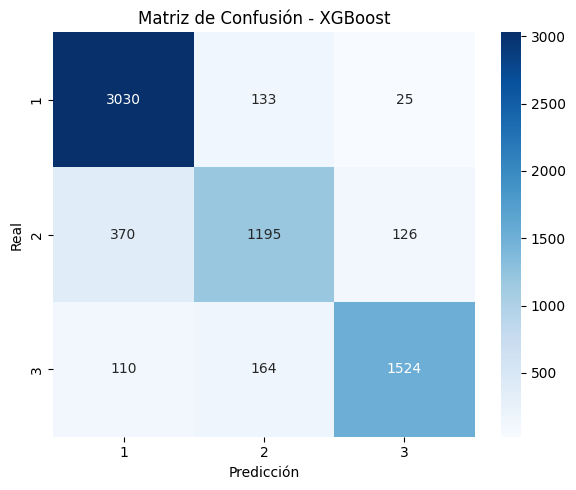

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Matriz de confusión del modelo XGBoost
cm = np.array([
    [3030, 133, 25],
    [370, 1195, 126],
    [110, 164, 1524]
])

# Etiquetas de clases (mismo formato que antes)
labels = ["1", "2", "3"]

# Graficar
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.title("Matriz de Confusión - XGBoost")
plt.xlabel("Predicción")
plt.ylabel("Real")

plt.tight_layout()
plt.show()


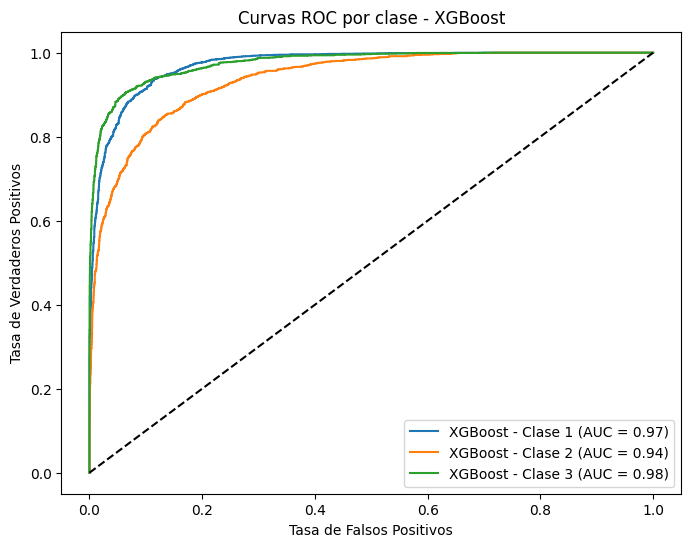

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize

# Assuming y_test is your original target variable
# Binarize the target variable for multi-class ROC curve
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Probabilidades de predicción
y_prob_xgb = xgb.predict_proba(X_test)

# Curvas ROC por clase
plt.figure(figsize=(8,6))
for i in range(y_test_bin.shape[1]):  # Iterate over number of classes
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob_xgb[:, i])
    auc = roc_auc_score(y_test_bin[:, i], y_prob_xgb[:, i])
    plt.plot(fpr, tpr, label=f'XGBoost - Clase {i+1} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curvas ROC por clase - XGBoost")
plt.legend()
plt.show()

C:\Users\Egoista\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [22:41:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[0]	validation_0-mlogloss:0.92919	validation_1-mlogloss:0.93553
[1]	validation_0-mlogloss:0.82383	validation_1-mlogloss:0.83567
[2]	validation_0-mlogloss:0.74463	validation_1-mlogloss:0.75904
[3]	validation_0-mlogloss:0.68997	validation_1-mlogloss:0.70841
[4]	validation_0-mlogloss:0.64784	validation_1-mlogloss:0.66958
[5]	validation_0-mlogloss:0.61657	validation_1-mlogloss:0.64126
[6]	validation_0-mlogloss:0.59223	validation_1-mlogloss:0.61987
[7]	validation_0-mlogloss:0.57129	validation_1-mlogloss:0.60051
[8]	validation_0-mlogloss:0.55284	validation_1-mlogloss:0.58375
[9]	validation_0-mlogloss:0.54016	validation_1-mlogloss:0.57175
[10]	validation_0-mlogloss:0.52863	validation_1-mlogloss:0.56207
[11]	validation_0-mlogloss:0.51895	validation_1-mlogloss:0.55375
[12]	validation_0-mlogloss:0.51008	validation_1-mlogloss:0.54552
[13]	validation_0-mlogloss:0.50215	validation_1-mlogloss:0.53881
[14]	validation_0-mlogloss:0.49321	validation_1-mlogloss:0.53103
[15]	validation_0-mlogloss:0.48621	

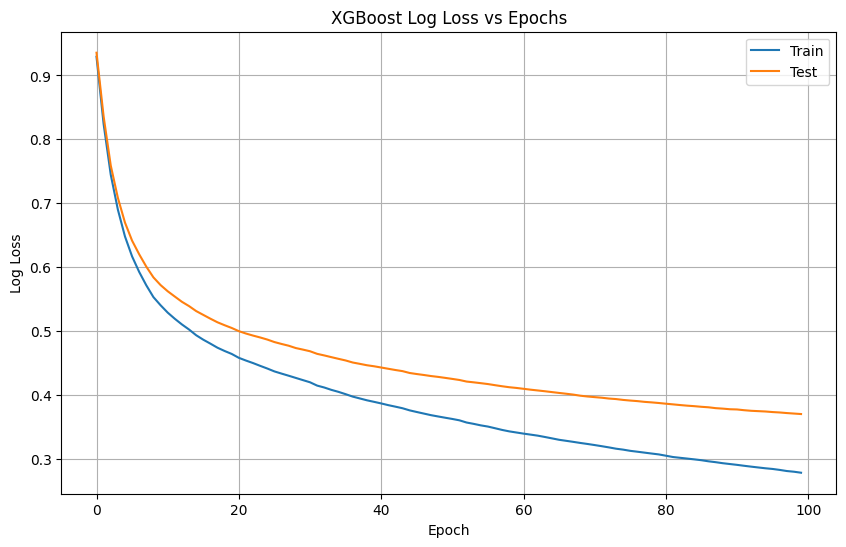

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib

# Cargar datos
df = pd.read_csv("normalized_dataset.csv", sep=";", encoding="utf-8")

# Extraer severidad del último dígito de la columna GRD
df["Severidad"] = df["GRD"].astype(str).str[-1].astype(int)

# Features: eliminamos 'GRD' y 'Severidad'
X = df.drop(columns=["GRD", "Severidad"])
y = df["Severidad"] - 1  # Ajustar para que las clases sean 0, 1, 2

# Codificación si hay columnas categóricas
X = pd.get_dummies(X)

# Escalado de datos (opcional)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División entrenamiento/prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4, random_state=42)

# Modelo XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Entrenamiento con evaluación en train y test
eval_set = [(X_train, y_train), (X_test, y_test)]
xgb.fit(
    X_train,
    y_train,
    eval_set=eval_set,
    verbose=True
)

# Predicción
y_pred = xgb.predict(X_test)

# Guardar el modelo
joblib.dump(xgb, "xgboost_model.pkl")
joblib.dump(scaler, "scaler.pkl")  # Guardamos también el scaler por si se necesita luego

# Evaluación
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Obtener resultados del entrenamiento
results = xgb.evals_result()

# Graficar loss vs epochs
epochs = len(results['validation_0']['mlogloss'])
x_axis = range(0, epochs)

plt.figure(figsize=(10, 6))
plt.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
plt.plot(x_axis, results['validation_1']['mlogloss'], label='Test')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss vs Epochs')
plt.grid(True)
plt.show()


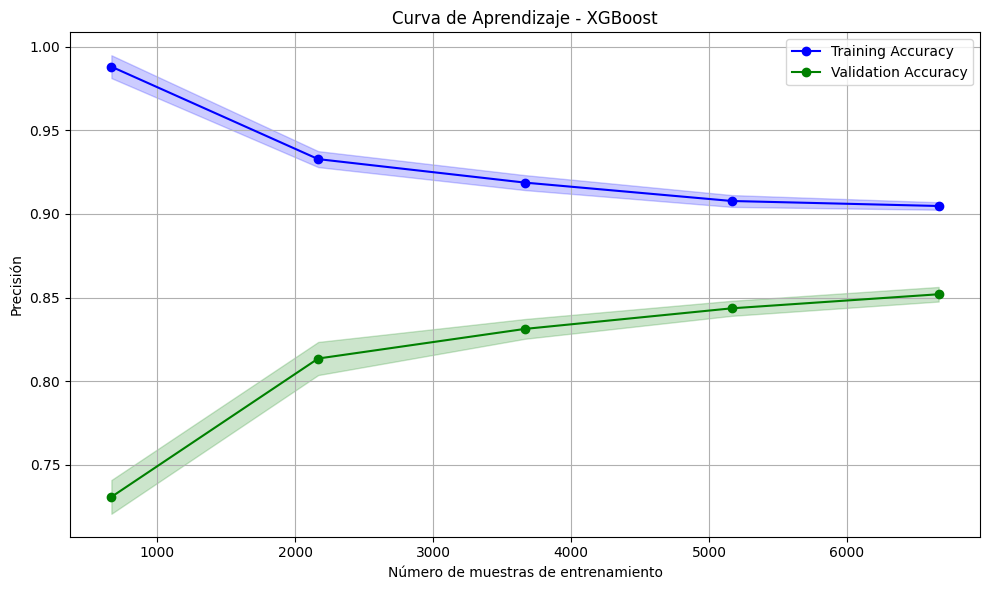

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.utils import resample
from xgboost import XGBClassifier

# Reducir el tamaño del conjunto para pruebas más rápidas (por ejemplo, 10000 muestras)
X_sample, y_sample = resample(X_scaled, y, n_samples=10000, random_state=42)

# Generar curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42, n_estimators=50),
    X=X_sample,
    y=y_sample,
    train_sizes=np.linspace(0.1, 1.0, 5),  # Solo 5 puntos para reducir carga
    cv=3,                                  # 3 particiones para validación cruzada
    scoring='accuracy',
    n_jobs=-1,
    shuffle=True,
    random_state=42
)

# Calcular medias y desviaciones
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Accuracy')
plt.plot(train_sizes, test_mean, 'o-', color='green', label='Validation Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color='green')
plt.title('Curva de Aprendizaje - XGBoost')
plt.xlabel('Número de muestras de entrenamiento')
plt.ylabel('Precisión')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()



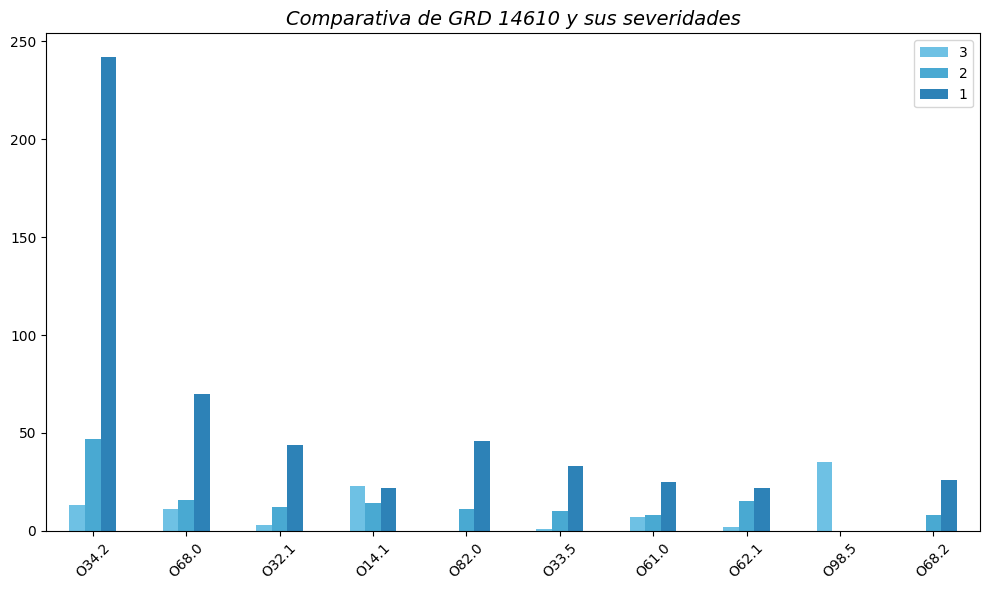

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Asegúrate de que GRD sea string
df["GRD"] = df["GRD"].astype(str)

# Filtrar por GRDs deseados
grds = ['146101', '146102', '146103']
df_filtrado = df[df["GRD"].isin(grds)]

# Crear tabla cruzada: filas=Diag01, columnas=GRD
tabla = pd.crosstab(df_filtrado["Diag01"], df_filtrado["GRD"])

# Seleccionar los diagnósticos más frecuentes (top 10 por suma)
top_diag = tabla.sum(axis=1).sort_values(ascending=False).head(10).index
tabla_top = tabla.loc[top_diag]

# Reordenar columnas para control visual
tabla_top = tabla_top[["146103", "146102", "146101"]]  # Ordena como en la imagen

# Plot
ax = tabla_top.plot(kind="bar", figsize=(10, 6), color=["#6EC1E4", "#49A9D2", "#2D82B7"])

# Estilo
plt.title("Comparativa de GRD 14610 y sus severidades", fontsize=14, fontstyle="italic")
plt.ylabel("")
plt.xlabel("")
plt.xticks(rotation=45)
plt.legend(["3", "2", "1"], title="", loc="upper right")
plt.tight_layout()

plt.show()


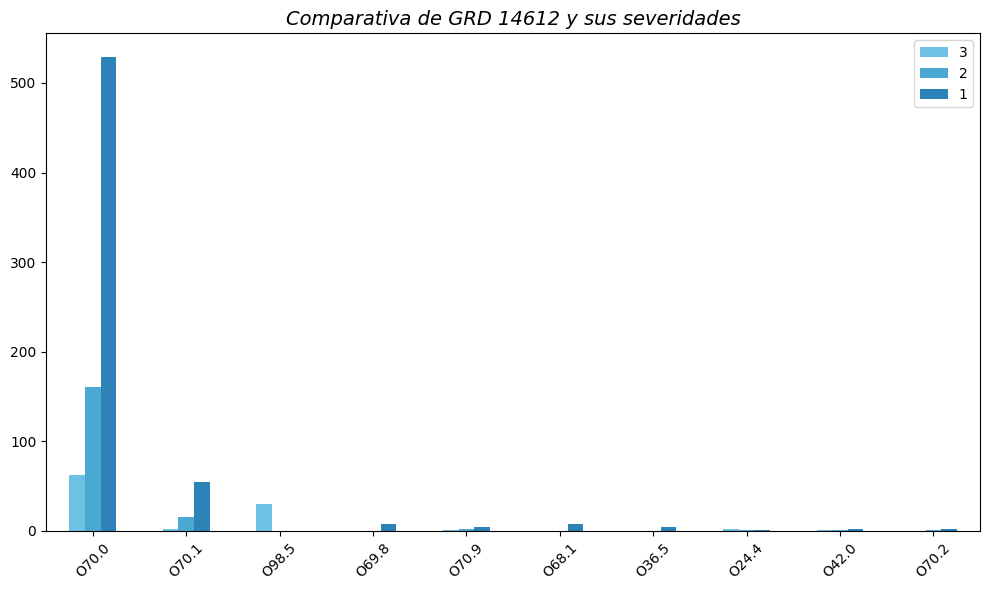

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Asegúrate de que GRD sea string
df["GRD"] = df["GRD"].astype(str)

# Filtrar por GRDs deseados
grds = ['146121', '146122', '146123']
df_filtrado = df[df["GRD"].isin(grds)]

# Crear tabla cruzada: filas=Diag01, columnas=GRD
tabla = pd.crosstab(df_filtrado["Diag01"], df_filtrado["GRD"])

# Seleccionar los diagnósticos más frecuentes (top 10 por suma)
top_diag = tabla.sum(axis=1).sort_values(ascending=False).head(10).index
tabla_top = tabla.loc[top_diag]

# Reordenar columnas para control visual
tabla_top = tabla_top[["146123", "146122", "146121"]]  # Ordena como en la imagen

# Plot
ax = tabla_top.plot(kind="bar", figsize=(10, 6), color=["#6EC1E4", "#49A9D2", "#2D82B7"])

# Estilo
plt.title("Comparativa de GRD 14612 y sus severidades", fontsize=14, fontstyle="italic")
plt.ylabel("")
plt.xlabel("")
plt.xticks(rotation=45)
plt.legend(["3", "2", "1"], title="", loc="upper right")
plt.tight_layout()

plt.show()


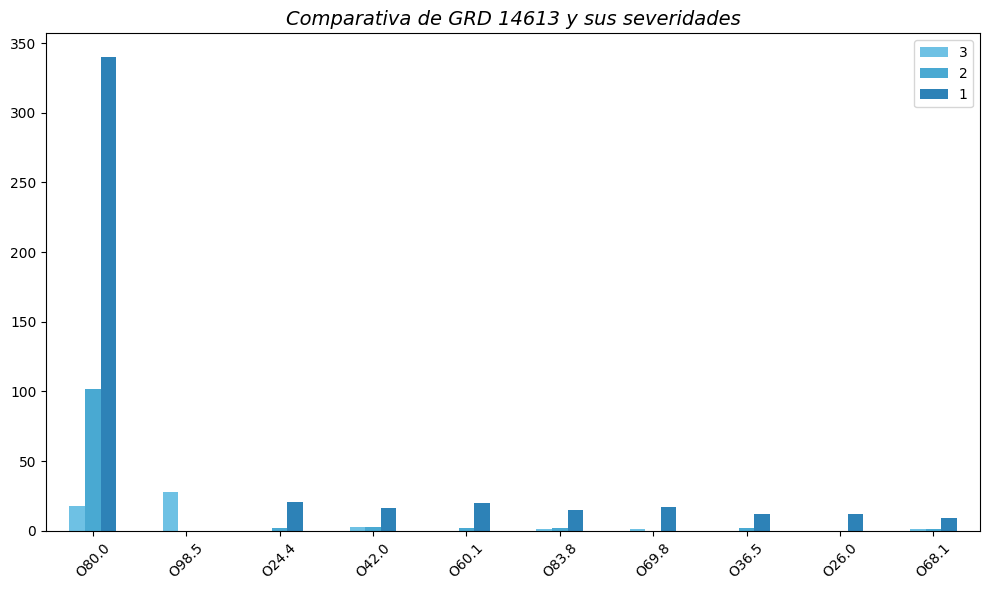

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Asegúrate de que GRD sea string
df["GRD"] = df["GRD"].astype(str)

# Filtrar por GRDs deseados
grds = ['146131', '146132', '146133']
df_filtrado = df[df["GRD"].isin(grds)]

# Crear tabla cruzada: filas=Diag01, columnas=GRD
tabla = pd.crosstab(df_filtrado["Diag01"], df_filtrado["GRD"])

# Seleccionar los diagnósticos más frecuentes (top 10 por suma)
top_diag = tabla.sum(axis=1).sort_values(ascending=False).head(10).index
tabla_top = tabla.loc[top_diag]

# Reordenar columnas para control visual
tabla_top = tabla_top[["146133", "146132", "146131"]]  # Ordena como en la imagen

# Plot
ax = tabla_top.plot(kind="bar", figsize=(10, 6), color=["#6EC1E4", "#49A9D2", "#2D82B7"])

# Estilo
plt.title("Comparativa de GRD 14613 y sus severidades", fontsize=14, fontstyle="italic")
plt.ylabel("")
plt.xlabel("")
plt.xticks(rotation=45)
plt.legend(["3", "2", "1"], title="", loc="upper right")
plt.tight_layout()

plt.show()


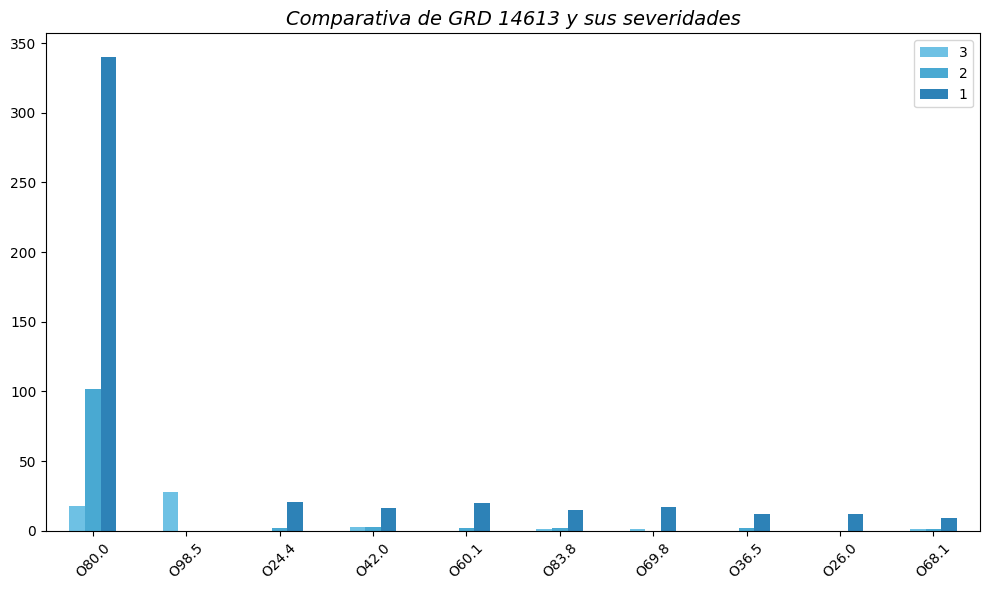

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Asegúrate de que GRD sea string
df["GRD"] = df["GRD"].astype(str)

# Filtrar por GRDs deseados
grds = ['146131', '146132', '146133']
df_filtrado = df[df["GRD"].isin(grds)]

# Crear tabla cruzada: filas=Diag01, columnas=GRD
tabla = pd.crosstab(df_filtrado["Diag01"], df_filtrado["GRD"])

# Seleccionar los diagnósticos más frecuentes (top 10 por suma)
top_diag = tabla.sum(axis=1).sort_values(ascending=False).head(10).index
tabla_top = tabla.loc[top_diag]

# Reordenar columnas para control visual
tabla_top = tabla_top[["146133", "146132", "146131"]]  # Ordena como en la imagen

# Plot
ax = tabla_top.plot(kind="bar", figsize=(10, 6), color=["#6EC1E4", "#49A9D2", "#2D82B7"])

# EstiloS
plt.title("Comparativa de GRD 14613 y sus severidades", fontsize=14, fontstyle="italic")
plt.ylabel("")
plt.xlabel("")
plt.xticks(rotation=45)
plt.legend(["3", "2", "1"], title="", loc="upper right")
plt.tight_layout()

plt.show()


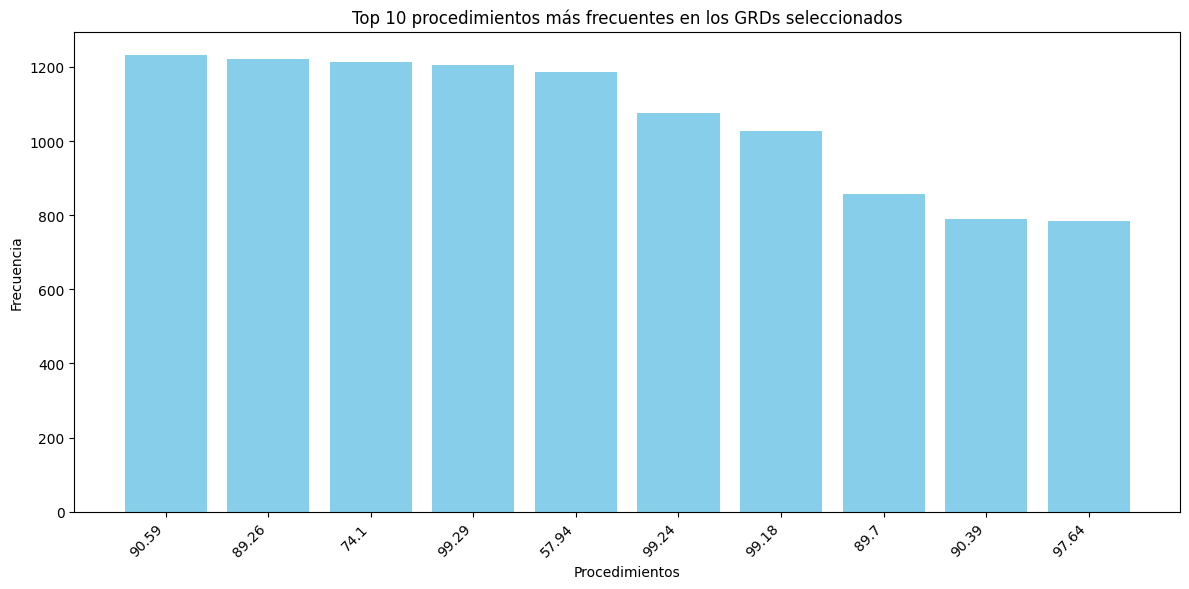

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el DataFrame
df = pd.read_csv("normalized_dataset.csv", sep=";", encoding="utf-8")

# Asegurarse de que la columna GRD sea tipo string
df["GRD"] = df["GRD"].astype(str)

# Filtrar por GRDs deseados
grds = ['146101', '146102', '146103']
df_filtrado = df[df["GRD"].isin(grds)]

# Inicializar un diccionario para contar frecuencias
procedimientos_frecuencia = {}

# Recorrer las columnas de procedimientos
for i in range(1, 31):
    columna = f"Proced{str(i).zfill(2)}"
    if columna in df_filtrado.columns:
        # Contar frecuencia de cada procedimiento, excluyendo "Desconocido" y NaN
        valores = df_filtrado[columna].dropna()
        valores = valores[valores != "Desconocido"]
        frecuencias = valores.value_counts()
        for proc, freq in frecuencias.items():
            procedimientos_frecuencia[proc] = procedimientos_frecuencia.get(proc, 0) + freq

# Convertir el diccionario en DataFrame y ordenar
df_procedimientos = pd.DataFrame.from_dict(procedimientos_frecuencia, orient='index', columns=['Frecuencia'])
df_procedimientos = df_procedimientos.sort_values(by='Frecuencia', ascending=False).head(10)

# Convert index to string before plotting
# This ensures plt.bar receives string labels for the x-axis
df_procedimientos.index = df_procedimientos.index.astype(str)


# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(df_procedimientos.index, df_procedimientos['Frecuencia'], color='skyblue')
plt.xlabel("Procedimientos")
plt.ylabel("Frecuencia")
plt.title("Top 10 procedimientos más frecuentes en los GRDs seleccionados")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

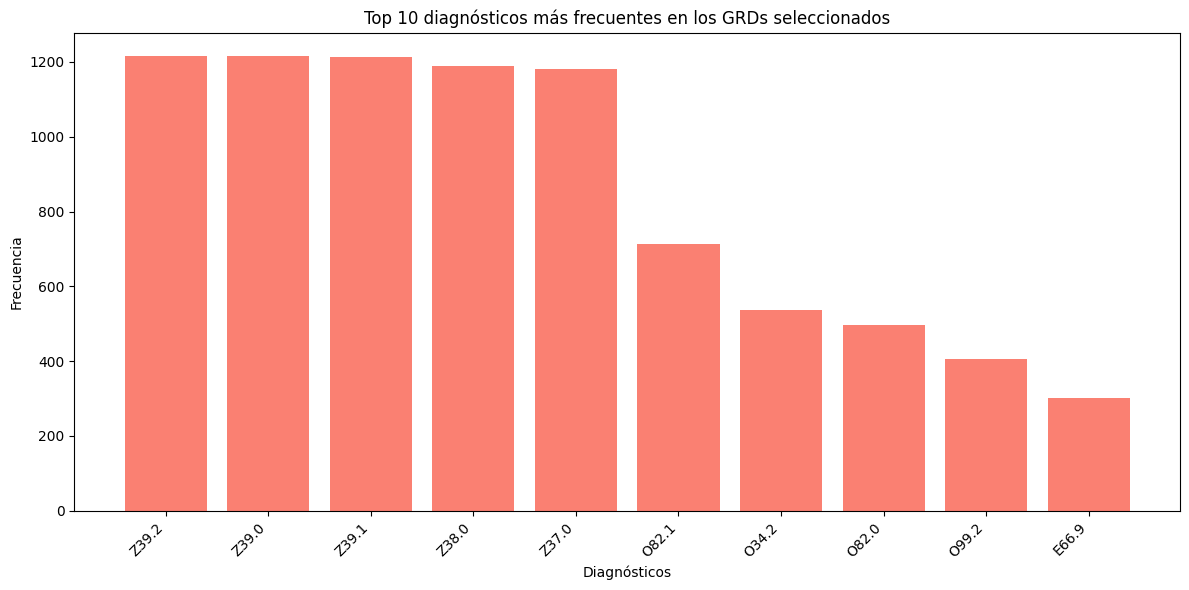

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el DataFrame
df = pd.read_csv("normalized_dataset.csv", sep=";", encoding="utf-8")

# Asegurarse de que la columna GRD sea tipo string
df["GRD"] = df["GRD"].astype(str)

# Filtrar por GRDs deseados
grds = ['146101', '146102', '146103']
df_filtrado = df[df["GRD"].isin(grds)]

# Inicializar un diccionario para contar frecuencias de diagnósticos
diagnosticos_frecuencia = {}

# Recorrer las columnas de diagnósticos
for i in range(1, 31):
    columna = f"Diag{str(i).zfill(2)}"
    if columna in df_filtrado.columns:
        # Contar frecuencia de cada diagnóstico, excluyendo "Desconocido" y NaN
        valores = df_filtrado[columna].dropna()
        valores = valores[valores != "Desconocido"]
        frecuencias = valores.value_counts()
        for diag, freq in frecuencias.items():
            diagnosticos_frecuencia[diag] = diagnosticos_frecuencia.get(diag, 0) + freq

# Convertir el diccionario en DataFrame y ordenar
df_diagnosticos = pd.DataFrame.from_dict(diagnosticos_frecuencia, orient='index', columns=['Frecuencia'])
df_diagnosticos = df_diagnosticos.sort_values(by='Frecuencia', ascending=False).head(10)

# Convertir índice a string antes de graficar
df_diagnosticos.index = df_diagnosticos.index.astype(str)

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(df_diagnosticos.index, df_diagnosticos['Frecuencia'], color='salmon')
plt.xlabel("Diagnósticos")
plt.ylabel("Frecuencia")
plt.title("Top 10 diagnósticos más frecuentes en los GRDs seleccionados")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


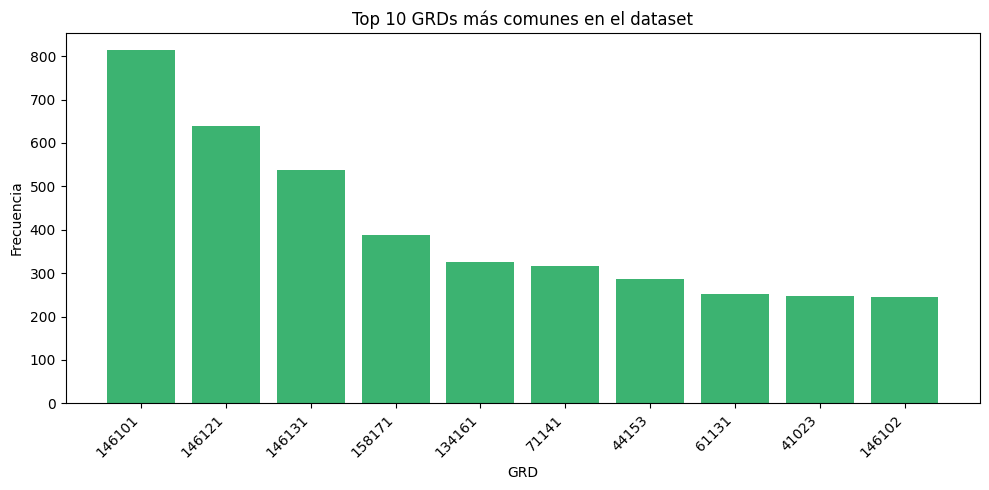

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el DataFrame completo
df = pd.read_csv("normalized_dataset.csv", sep=";", encoding="utf-8")

# Asegurarse de que la columna GRD sea tipo string
df["GRD"] = df["GRD"].astype(str)

# Contar las frecuencias de todos los GRDs
grd_frecuencias = df["GRD"].value_counts().head(10)

# Crear el gráfico de barras
plt.figure(figsize=(10, 5))
plt.bar(grd_frecuencias.index, grd_frecuencias.values, color='mediumseagreen')
plt.xlabel("GRD")
plt.ylabel("Frecuencia")
plt.title("Top 10 GRDs más comunes en el dataset")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()